In [ ]:
import numpy as np
from shapely.geometry.point import Point
from skimage.draw import circle_perimeter_aa
import matplotlib.pyplot as plt

In [2]:
def draw_circle(img, row, col, rad):
    rr, cc, val = circle_perimeter_aa(row, col, rad)
    valid = (
        (rr >= 0) &
        (rr < img.shape[0]) &
        (cc >= 0) &
        (cc < img.shape[1])
    )
    img[rr[valid], cc[valid]] = val[valid]


def noisy_circle(size, radius, noise):
    img = np.zeros((size, size), dtype=np.float)

    # Circle
    row = np.random.randint(size)
    col = np.random.randint(size)
    rad = np.random.randint(10, max(10, radius))
    draw_circle(img, row, col, rad)

    # Noise
    img += noise * np.random.rand(*img.shape)
    return (row, col, rad), img




def iou(params0, params1):
    row0, col0, rad0 = params0
    row1, col1, rad1 = params1

    shape0 = Point(row0, col0).buffer(rad0)
    shape1 = Point(row1, col1).buffer(rad1)

    return (
        shape0.intersection(shape1).area /
        shape0.union(shape1).area
    )

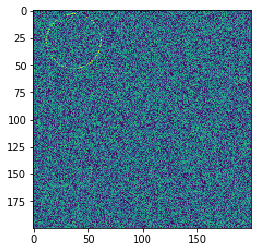

In [3]:
sample = noisy_circle(200, 50, 2)
plt.imshow(sample[1])

# training a CNN

I have tried to train a CNN. but because of my memory limits I was able to only use 2000 images as training set and so the model is very terrible. 

In [4]:
from sklearn.model_selection import train_test_split
data_size = 5000
max_radius = 50
max_noise_level = 2
image_size = 200

Data_X = np.zeros((data_size, image_size, image_size))
Data_y = np.zeros((data_size, 3))

for i in range(data_size):
    noise = np.random.randint(0, max_noise_level)
    image = noisy_circle(image_size, max_radius, noise)

    Data_X[i] = image[1].astype("double")
    Data_y[i] = np.array(image[0])
    print("generating image " + str(i) + " out of " + str(data_size))



generating image 0 out of 5000
generating image 1 out of 5000
generating image 2 out of 5000
generating image 3 out of 5000
generating image 4 out of 5000
generating image 5 out of 5000
generating image 6 out of 5000
generating image 7 out of 5000
generating image 8 out of 5000
generating image 9 out of 5000
generating image 10 out of 5000
generating image 11 out of 5000
generating image 12 out of 5000
generating image 13 out of 5000
generating image 14 out of 5000
generating image 15 out of 5000
generating image 16 out of 5000
generating image 17 out of 5000
generating image 18 out of 5000
generating image 19 out of 5000
generating image 20 out of 5000
generating image 21 out of 5000
generating image 22 out of 5000
generating image 23 out of 5000
generating image 24 out of 5000
generating image 25 out of 5000
generating image 26 out of 5000
generating image 27 out of 5000
generating image 28 out of 5000
generating image 29 out of 5000
generating image 30 out of 5000
generating image 3

generating image 343 out of 5000
generating image 344 out of 5000
generating image 345 out of 5000
generating image 346 out of 5000
generating image 347 out of 5000
generating image 348 out of 5000
generating image 349 out of 5000
generating image 350 out of 5000
generating image 351 out of 5000
generating image 352 out of 5000
generating image 353 out of 5000
generating image 354 out of 5000
generating image 355 out of 5000
generating image 356 out of 5000
generating image 357 out of 5000
generating image 358 out of 5000
generating image 359 out of 5000
generating image 360 out of 5000
generating image 361 out of 5000
generating image 362 out of 5000
generating image 363 out of 5000
generating image 364 out of 5000
generating image 365 out of 5000
generating image 366 out of 5000
generating image 367 out of 5000
generating image 368 out of 5000
generating image 369 out of 5000
generating image 370 out of 5000
generating image 371 out of 5000
generating image 372 out of 5000
generating

generating image 697 out of 5000
generating image 698 out of 5000
generating image 699 out of 5000
generating image 700 out of 5000
generating image 701 out of 5000
generating image 702 out of 5000
generating image 703 out of 5000
generating image 704 out of 5000
generating image 705 out of 5000
generating image 706 out of 5000
generating image 707 out of 5000
generating image 708 out of 5000
generating image 709 out of 5000
generating image 710 out of 5000
generating image 711 out of 5000
generating image 712 out of 5000
generating image 713 out of 5000
generating image 714 out of 5000
generating image 715 out of 5000
generating image 716 out of 5000
generating image 717 out of 5000
generating image 718 out of 5000
generating image 719 out of 5000
generating image 720 out of 5000
generating image 721 out of 5000
generating image 722 out of 5000
generating image 723 out of 5000
generating image 724 out of 5000
generating image 725 out of 5000
generating image 726 out of 5000
generating

generating image 1054 out of 5000
generating image 1055 out of 5000
generating image 1056 out of 5000
generating image 1057 out of 5000
generating image 1058 out of 5000
generating image 1059 out of 5000
generating image 1060 out of 5000
generating image 1061 out of 5000
generating image 1062 out of 5000
generating image 1063 out of 5000
generating image 1064 out of 5000
generating image 1065 out of 5000
generating image 1066 out of 5000
generating image 1067 out of 5000
generating image 1068 out of 5000
generating image 1069 out of 5000
generating image 1070 out of 5000
generating image 1071 out of 5000
generating image 1072 out of 5000
generating image 1073 out of 5000
generating image 1074 out of 5000
generating image 1075 out of 5000
generating image 1076 out of 5000
generating image 1077 out of 5000
generating image 1078 out of 5000
generating image 1079 out of 5000
generating image 1080 out of 5000
generating image 1081 out of 5000
generating image 1082 out of 5000
generating ima

generating image 1405 out of 5000
generating image 1406 out of 5000
generating image 1407 out of 5000
generating image 1408 out of 5000
generating image 1409 out of 5000
generating image 1410 out of 5000
generating image 1411 out of 5000
generating image 1412 out of 5000
generating image 1413 out of 5000
generating image 1414 out of 5000
generating image 1415 out of 5000
generating image 1416 out of 5000
generating image 1417 out of 5000
generating image 1418 out of 5000
generating image 1419 out of 5000
generating image 1420 out of 5000
generating image 1421 out of 5000
generating image 1422 out of 5000
generating image 1423 out of 5000
generating image 1424 out of 5000
generating image 1425 out of 5000
generating image 1426 out of 5000
generating image 1427 out of 5000
generating image 1428 out of 5000
generating image 1429 out of 5000
generating image 1430 out of 5000
generating image 1431 out of 5000
generating image 1432 out of 5000
generating image 1433 out of 5000
generating ima

generating image 1738 out of 5000
generating image 1739 out of 5000
generating image 1740 out of 5000
generating image 1741 out of 5000
generating image 1742 out of 5000
generating image 1743 out of 5000
generating image 1744 out of 5000
generating image 1745 out of 5000
generating image 1746 out of 5000
generating image 1747 out of 5000
generating image 1748 out of 5000
generating image 1749 out of 5000
generating image 1750 out of 5000
generating image 1751 out of 5000
generating image 1752 out of 5000
generating image 1753 out of 5000
generating image 1754 out of 5000
generating image 1755 out of 5000
generating image 1756 out of 5000
generating image 1757 out of 5000
generating image 1758 out of 5000
generating image 1759 out of 5000
generating image 1760 out of 5000
generating image 1761 out of 5000
generating image 1762 out of 5000
generating image 1763 out of 5000
generating image 1764 out of 5000
generating image 1765 out of 5000
generating image 1766 out of 5000
generating ima

generating image 2071 out of 5000
generating image 2072 out of 5000
generating image 2073 out of 5000
generating image 2074 out of 5000
generating image 2075 out of 5000
generating image 2076 out of 5000
generating image 2077 out of 5000
generating image 2078 out of 5000
generating image 2079 out of 5000
generating image 2080 out of 5000
generating image 2081 out of 5000
generating image 2082 out of 5000
generating image 2083 out of 5000
generating image 2084 out of 5000
generating image 2085 out of 5000
generating image 2086 out of 5000
generating image 2087 out of 5000
generating image 2088 out of 5000
generating image 2089 out of 5000
generating image 2090 out of 5000
generating image 2091 out of 5000
generating image 2092 out of 5000
generating image 2093 out of 5000
generating image 2094 out of 5000
generating image 2095 out of 5000
generating image 2096 out of 5000
generating image 2097 out of 5000
generating image 2098 out of 5000
generating image 2099 out of 5000
generating ima

generating image 2425 out of 5000
generating image 2426 out of 5000
generating image 2427 out of 5000
generating image 2428 out of 5000
generating image 2429 out of 5000
generating image 2430 out of 5000
generating image 2431 out of 5000
generating image 2432 out of 5000
generating image 2433 out of 5000
generating image 2434 out of 5000
generating image 2435 out of 5000
generating image 2436 out of 5000
generating image 2437 out of 5000
generating image 2438 out of 5000
generating image 2439 out of 5000
generating image 2440 out of 5000
generating image 2441 out of 5000
generating image 2442 out of 5000
generating image 2443 out of 5000
generating image 2444 out of 5000
generating image 2445 out of 5000
generating image 2446 out of 5000
generating image 2447 out of 5000
generating image 2448 out of 5000
generating image 2449 out of 5000
generating image 2450 out of 5000
generating image 2451 out of 5000
generating image 2452 out of 5000
generating image 2453 out of 5000
generating ima

generating image 2773 out of 5000
generating image 2774 out of 5000
generating image 2775 out of 5000
generating image 2776 out of 5000
generating image 2777 out of 5000
generating image 2778 out of 5000
generating image 2779 out of 5000
generating image 2780 out of 5000
generating image 2781 out of 5000
generating image 2782 out of 5000
generating image 2783 out of 5000
generating image 2784 out of 5000
generating image 2785 out of 5000
generating image 2786 out of 5000
generating image 2787 out of 5000
generating image 2788 out of 5000
generating image 2789 out of 5000
generating image 2790 out of 5000
generating image 2791 out of 5000
generating image 2792 out of 5000
generating image 2793 out of 5000
generating image 2794 out of 5000
generating image 2795 out of 5000
generating image 2796 out of 5000
generating image 2797 out of 5000
generating image 2798 out of 5000
generating image 2799 out of 5000
generating image 2800 out of 5000
generating image 2801 out of 5000
generating ima

generating image 3130 out of 5000
generating image 3131 out of 5000
generating image 3132 out of 5000
generating image 3133 out of 5000
generating image 3134 out of 5000
generating image 3135 out of 5000
generating image 3136 out of 5000
generating image 3137 out of 5000
generating image 3138 out of 5000
generating image 3139 out of 5000
generating image 3140 out of 5000
generating image 3141 out of 5000
generating image 3142 out of 5000
generating image 3143 out of 5000
generating image 3144 out of 5000
generating image 3145 out of 5000
generating image 3146 out of 5000
generating image 3147 out of 5000
generating image 3148 out of 5000
generating image 3149 out of 5000
generating image 3150 out of 5000
generating image 3151 out of 5000
generating image 3152 out of 5000
generating image 3153 out of 5000
generating image 3154 out of 5000
generating image 3155 out of 5000
generating image 3156 out of 5000
generating image 3157 out of 5000
generating image 3158 out of 5000
generating ima

generating image 3464 out of 5000
generating image 3465 out of 5000
generating image 3466 out of 5000
generating image 3467 out of 5000
generating image 3468 out of 5000
generating image 3469 out of 5000
generating image 3470 out of 5000
generating image 3471 out of 5000
generating image 3472 out of 5000
generating image 3473 out of 5000
generating image 3474 out of 5000
generating image 3475 out of 5000
generating image 3476 out of 5000
generating image 3477 out of 5000
generating image 3478 out of 5000
generating image 3479 out of 5000
generating image 3480 out of 5000
generating image 3481 out of 5000
generating image 3482 out of 5000
generating image 3483 out of 5000
generating image 3484 out of 5000
generating image 3485 out of 5000
generating image 3486 out of 5000
generating image 3487 out of 5000
generating image 3488 out of 5000
generating image 3489 out of 5000
generating image 3490 out of 5000
generating image 3491 out of 5000
generating image 3492 out of 5000
generating ima

generating image 3804 out of 5000
generating image 3805 out of 5000
generating image 3806 out of 5000
generating image 3807 out of 5000
generating image 3808 out of 5000
generating image 3809 out of 5000
generating image 3810 out of 5000
generating image 3811 out of 5000
generating image 3812 out of 5000
generating image 3813 out of 5000
generating image 3814 out of 5000
generating image 3815 out of 5000
generating image 3816 out of 5000
generating image 3817 out of 5000
generating image 3818 out of 5000
generating image 3819 out of 5000
generating image 3820 out of 5000
generating image 3821 out of 5000
generating image 3822 out of 5000
generating image 3823 out of 5000
generating image 3824 out of 5000
generating image 3825 out of 5000
generating image 3826 out of 5000
generating image 3827 out of 5000
generating image 3828 out of 5000
generating image 3829 out of 5000
generating image 3830 out of 5000
generating image 3831 out of 5000
generating image 3832 out of 5000
generating ima

generating image 4162 out of 5000
generating image 4163 out of 5000
generating image 4164 out of 5000
generating image 4165 out of 5000
generating image 4166 out of 5000
generating image 4167 out of 5000
generating image 4168 out of 5000
generating image 4169 out of 5000
generating image 4170 out of 5000
generating image 4171 out of 5000
generating image 4172 out of 5000
generating image 4173 out of 5000
generating image 4174 out of 5000
generating image 4175 out of 5000
generating image 4176 out of 5000
generating image 4177 out of 5000
generating image 4178 out of 5000
generating image 4179 out of 5000
generating image 4180 out of 5000
generating image 4181 out of 5000
generating image 4182 out of 5000
generating image 4183 out of 5000
generating image 4184 out of 5000
generating image 4185 out of 5000
generating image 4186 out of 5000
generating image 4187 out of 5000
generating image 4188 out of 5000
generating image 4189 out of 5000
generating image 4190 out of 5000
generating ima

generating image 4506 out of 5000
generating image 4507 out of 5000
generating image 4508 out of 5000
generating image 4509 out of 5000
generating image 4510 out of 5000
generating image 4511 out of 5000
generating image 4512 out of 5000
generating image 4513 out of 5000
generating image 4514 out of 5000
generating image 4515 out of 5000
generating image 4516 out of 5000
generating image 4517 out of 5000
generating image 4518 out of 5000
generating image 4519 out of 5000
generating image 4520 out of 5000
generating image 4521 out of 5000
generating image 4522 out of 5000
generating image 4523 out of 5000
generating image 4524 out of 5000
generating image 4525 out of 5000
generating image 4526 out of 5000
generating image 4527 out of 5000
generating image 4528 out of 5000
generating image 4529 out of 5000
generating image 4530 out of 5000
generating image 4531 out of 5000
generating image 4532 out of 5000
generating image 4533 out of 5000
generating image 4534 out of 5000
generating ima

generating image 4861 out of 5000
generating image 4862 out of 5000
generating image 4863 out of 5000
generating image 4864 out of 5000
generating image 4865 out of 5000
generating image 4866 out of 5000
generating image 4867 out of 5000
generating image 4868 out of 5000
generating image 4869 out of 5000
generating image 4870 out of 5000
generating image 4871 out of 5000
generating image 4872 out of 5000
generating image 4873 out of 5000
generating image 4874 out of 5000
generating image 4875 out of 5000
generating image 4876 out of 5000
generating image 4877 out of 5000
generating image 4878 out of 5000
generating image 4879 out of 5000
generating image 4880 out of 5000
generating image 4881 out of 5000
generating image 4882 out of 5000
generating image 4883 out of 5000
generating image 4884 out of 5000
generating image 4885 out of 5000
generating image 4886 out of 5000
generating image 4887 out of 5000
generating image 4888 out of 5000
generating image 4889 out of 5000
generating ima

In [5]:
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import Dataset
from torchvision import transforms
from torchvision.transforms import ToTensor


In [6]:
class dataset(Dataset):
    def __init__(self, data_X, data_Y, transform):
        self.X= data_X.astype("float32")
        self.Y = data_Y.astype("float32")
        self.transform = transform
    def __getitem__(self, index):
        X = transform(self.X[index])
        Y = self.Y[index]
        return X, Y
    def __len__(self):
        return self.X.shape[0]
        
        

In [7]:
transform = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize(mean=[0.5], std=[0.5])
                       ])

trainset = dataset(Data_X, Data_y, transform)

In [8]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                         shuffle=False)


In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 128, 3, 1)
        self.conv3 = nn.Conv2d(128, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(48 * 48 * 64, 128)
        self.fc2 = nn.Linear(128, 32)
        self.fc3 = nn.Linear(32, 3)
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = self.conv3(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        x = F.relu(x)
        output = self.fc3(x)
           
        return output
    
    

In [10]:
net = Net()

In [11]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.RMSprop(net.parameters(), lr=1e-4, momentum = 0.9)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=147456, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=3, bias=True)
)

In [12]:
num_epochs = 3
running_loss = 0.0
for epoch in range(num_epochs):
    for i, data in enumerate(trainloader):
        images, cords = data
        outputs = net(images)
        loss = criterion(outputs, cords / 200)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 10 == 0:  
            print('[%d %5d] loss: %.3f' %
                  (epoch, i + 1, running_loss / 10))
            running_loss = 0.0
 



[0     1] loss: 0.024
[0    11] loss: 4.902
[0    21] loss: 0.178
[0    31] loss: 0.178
[0    41] loss: 0.161
[0    51] loss: 0.147
[0    61] loss: 0.138
[0    71] loss: 0.122
[0    81] loss: 0.110
[0    91] loss: 0.109
[0   101] loss: 0.097
[0   111] loss: 0.096
[0   121] loss: 0.084
[0   131] loss: 0.086
[0   141] loss: 0.079
[0   151] loss: 0.070


KeyboardInterrupt: 

In [21]:
def find_circle(img):
    with torch.no_grad():
        image = np.expand_dims(np.asarray(img), axis=0)
        image = torch.from_numpy(np.array(image, dtype=np.float32))
        normalize = transforms.Normalize(mean=[0.5], std=[0.5])
        image = normalize(image)
        image = image.unsqueeze(0)
        output = net(image)
    return [i for i in (200 * output).tolist()[0]]


In [22]:

def main():
    results = []
    for _ in range(1000):
        params, img = noisy_circle(200, 50, 2)
        detected = find_circle(img)
        results.append(iou(params, detected))
        print(detected)
    results = np.array(results)
    print((results > 0.7).mean())      

    

In [23]:
main()

[74.12100219726562, 79.83168029785156, 32.28433609008789]
[74.12100219726562, 79.83168029785156, 32.28433609008789]
[74.12100219726562, 79.83168029785156, 32.28433609008789]
[74.12100219726562, 79.83168029785156, 32.28433609008789]
[74.12100219726562, 79.83168029785156, 32.28433609008789]
[74.12100219726562, 79.83168029785156, 32.28433609008789]
[74.12100219726562, 79.83168029785156, 32.28433609008789]
[74.12100219726562, 79.83168029785156, 32.28433609008789]
[74.12100219726562, 79.83168029785156, 32.28433609008789]
[74.12100219726562, 79.83168029785156, 32.28433609008789]
[74.12100219726562, 79.83168029785156, 32.28433609008789]
[74.12100219726562, 79.83168029785156, 32.28433609008789]
[74.12100219726562, 79.83168029785156, 32.28433609008789]
[74.12100219726562, 79.83168029785156, 32.28433609008789]
[74.12100219726562, 79.83168029785156, 32.28433609008789]


KeyboardInterrupt: 